In [4]:
import pandas as pd
import numpy as np
from IPython.display import display
import sqlite3
from sqlalchemy import create_engine
import string
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt

In [6]:
!pip install plotly

     |████████████████████████████████| 28.8 MB 4.6 MB/s eta 0:00:01


In [10]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.4 MB/s eta 0:00:011
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=3bbf37a70fc1197643189f5c031781d2a74ccb5d77c2bf2e34edd547d5f4bb94
  Stored in directory: /Users/neeharbujimalla/Library/Caches/pip/wheels/ce/18/7f/e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [11]:
import plotly
import plotly.tools as tls
import chart_studio.plotly as py
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import Bar, Scatter, Marker, Layout, Choropleth, Histogram
import plotly.graph_objs as go
from  plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [13]:
complaints = pd.read_csv(r"/Users/neeharbujimalla/Downloads/complaints.csv")

In [14]:
complaints.shape ## Total Number of rows and columns (2602701, 18) in the data set

(2656044, 18)

In [15]:
complaints.head(2) ## head() is used to check the dataset head with 2 rows.

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-04-15,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,UNITED SERVICES AUTOMOBILE ASSOCIATION,FL,32812.0,NaN,NaN,Referral,2022-04-18,In progress,Yes,NaN,5462556
1,2022-05-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33713.0,NaN,NaN,Web,2022-05-02,In progress,Yes,NaN,5529881


### Data exploration

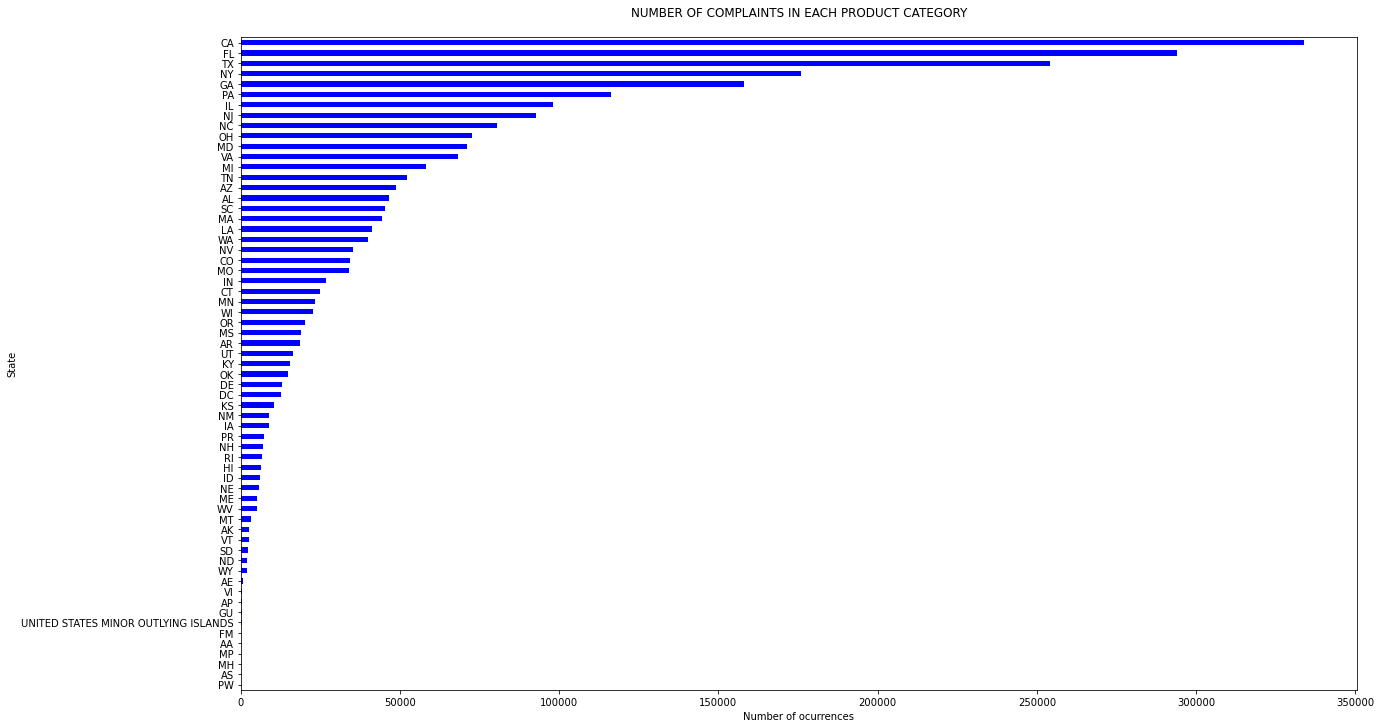

In [16]:
fig = plt.figure(figsize=(20,12))
complaints.groupby(['State'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n') ## Grouping by State and Complaint ID
plt.xlabel('Number of ocurrences', fontsize = 10);

#### California has the highest number of complaints compared to all the other states in USA. Let us dive into what complaints are these.

In [17]:
complaints[complaints['State'] == 'CA']['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    119959
Mortgage                                                                         58250
Debt collection                                                                  49431
Credit card or prepaid card                                                      21232
Credit reporting                                                                 18119
Checking or savings account                                                      17458
Credit card                                                                      12318
Bank account or service                                                          12164
Student loan                                                                      6907
Money transfer, virtual currency, or money service                                5427
Consumer Loan                                                                     3797
Vehicle loan or lease                      

The california has total highest number of cases registered camparing to other states and those are registered within 17 products range and credit reporting product has highest number of cases and other financial services has less complaints within product type.

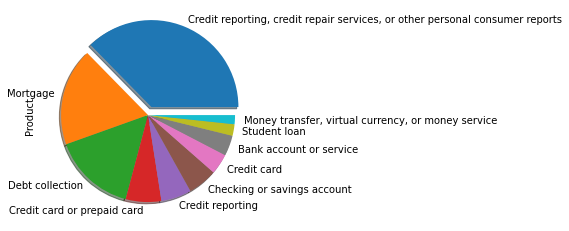

In [18]:
complaints[complaints['State'] == 'CA']['Product'].value_counts().head(10).plot.pie(explode=[0.1,0,0,0,0,0,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [19]:
complaints[complaints['State'] == 'CA']['Issue'].value_counts().head(10)

Incorrect information on your report                                                74441
Problem with a credit reporting company's investigation into an existing problem    29820
Loan modification,collection,foreclosure                                            22282
Attempts to collect debt not owed                                                   15411
Incorrect information on credit report                                              12994
Improper use of your report                                                         12825
Loan servicing, payments, escrow account                                            11195
Managing an account                                                                 11053
Cont'd attempts collect debt not owed                                                8454
Trouble during payment process                                                       7787
Name: Issue, dtype: int64

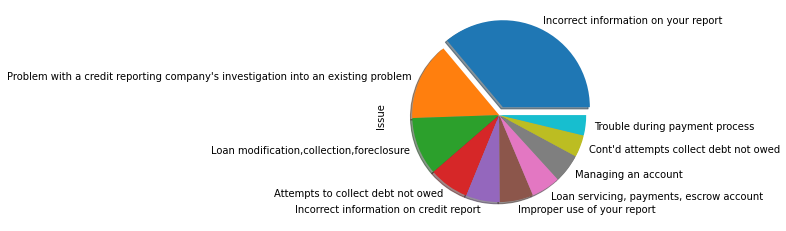

In [20]:
complaints[complaints['State'] == 'CA']['Issue'].value_counts().head(10).plot.pie(explode=[0.1,0,0,0,0,0,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [21]:
prd = round(complaints["Product"].value_counts() / len(complaints["Product"]) * 100,2)

print(prd)

labels = list(prd.index)
values = prd.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


prd_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

lyt = go.Layout(title='Product Types')

fig = go.Figure(data=[prd_pie], layout=lyt)
iplot(fig)

Credit reporting, credit repair services, or other personal consumer reports    41.08
Debt collection                                                                 15.89
Mortgage                                                                        13.30
Credit card or prepaid card                                                      5.40
Credit reporting                                                                 5.29
Checking or savings account                                                      4.58
Credit card                                                                      3.36
Bank account or service                                                          3.25
Student loan                                                                     2.51
Money transfer, virtual currency, or money service                               1.50
Vehicle loan or lease                                                            1.23
Consumer Loan                                         

In [22]:
db_conn = create_engine('sqlite://')

In [23]:
chunks = 2602701

In [25]:
for data in pd.read_csv("/Users/neeharbujimalla/Downloads/complaints.csv", chunksize=chunks,
                       iterator=True, encoding='utf-8'):
    
    data = data.rename(columns={col: col.replace('-', ' ') for col in data.columns})
    data = data.rename(columns={col: col.strip() for col in data.columns})
    data = data.rename(columns={col: string.capwords(col) for col in data.columns})
    data = data.rename(columns={col: col.replace(' ', '') for col in data.columns})
    
    data.to_sql('data', db_conn, if_exists='append')

In [26]:
pd.read_sql_query('SELECT * FROM data LIMIT 10', db_conn)

,index,DateReceived,Product,SubProduct,Issue,SubIssue,ConsumerComplaintNarrative,CompanyPublicResponse,Company,State,ZipCode,Tags,ConsumerConsentProvided?,SubmittedVia,DateSentToCompany,CompanyResponseToConsumer,TimelyResponse?,ConsumerDisputed?,ComplaintId
0,0,2022-04-15,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,None,None,UNITED SERVICES AUTOMOBILE ASSOCIATION,FL,32812.0,None,None,Referral,2022-04-18,In progress,Yes,None,5462556
1,1,2022-05-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,None,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33713.0,None,None,Web,2022-05-02,In progress,Yes,None,5529881
2,2,2022-03-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,None,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NJ,8081.0,None,Consent not provided,Web,2022-03-16,Closed with explanation,Yes,None,5330688
3,3,2022-03-16,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information belongs to someone else,None,None,Experian Information Solutions Inc.,FL,34205.0,None,None,Web,2022-03-16,In progress,Yes,None,5329460
4,4,2022-03-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,None,None,Experian Information Solutions Inc.,VA,20170.0,None,None,Web,2022-03-16,In progress,Yes,None,5330551
5,5,2022-03-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,None,None,Experian Information Solutions Inc.,SC,29680.0,None,None,Web,2022-03-16,In progress,Yes,None,5330528
6,6,2022-03-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,None,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,IA,52501.0,None,Consent not provided,Web,2022-03-16,Closed with non-monetary relief,Yes,None,5332960
7,7,2022-04-21,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,43110.0,None,None,Web,2022-04-21,In progress,Yes,None,5478570
8,8,2022-03-11,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I previously sent my written request to Experi...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MI,48235.0,None,Consent provided,Web,2022-03-11,Closed with explanation,Yes,None,5315991
9,9,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,None,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919.0,None,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,None,5177559


In [32]:
query = pd.read_sql_query('SELECT Product, Company, COUNT(*) as `Complaints`'
                         'FROM data '
                         'GROUP BY Product '
                         'ORDER BY `Complaints` DESC', db_conn)

In [33]:
py.iplot([Bar(x = query.Product, y = query.Complaints)], filename = 'ConsumerComplaints_Products with most complaints')

PlotlyRequestError: Authentication credentials were not provided.

In [34]:
## The comapny with most complaints.

query_responses = pd.read_sql_query('SELECT Company, COUNT(*) as `Complaints` '
                           'FROM data '
                           'GROUP BY Company '
                           'ORDER BY `Complaints` DESC '
                           'LIMIT 10 ', db_conn)

In [35]:
py.iplot([Bar(x=query_responses.Company, y=query_responses.Complaints)], filename='Company with most Complaints'

SyntaxError: unexpected EOF while parsing (3546426115.py, line 1)

In [36]:
from io import StringIO
import nltk
import collections as co
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

In [37]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [38]:
complaints.Product.unique()

array(['Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card', 'Mortgage', 'Debt collection',
       'Vehicle loan or lease', 'Student loan',
       'Money transfer, virtual currency, or money service',
       'Payday loan, title loan, or personal loan', 'Consumer Loan',
       'Bank account or service', 'Credit reporting', 'Credit card',
       'Money transfers', 'Payday loan', 'Prepaid card',
       'Other financial service', 'Virtual currency'], dtype=object)

In [39]:
date = complaints.pop('Date received')

In [40]:
date.head()

0    2022-04-15
1    2022-05-02
2    2022-03-16
3    2022-03-16
4    2022-03-16
Name: Date received, dtype: object

In [41]:
complaints.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    1091063
Debt collection                                                                  422135
Mortgage                                                                         353283
Credit card or prepaid card                                                      143402
Credit reporting                                                                 140430
Checking or savings account                                                      121547
Credit card                                                                       89190
Bank account or service                                                           86206
Student loan                                                                      66712
Money transfer, virtual currency, or money service                                39969
Vehicle loan or lease                                                             32625
Consumer Loan                   

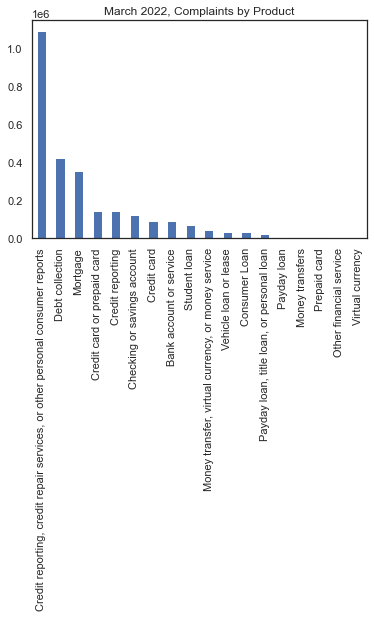

In [42]:
complaints.Product.value_counts().plot(title='March 2022, Complaints by Product', kind='bar')
plt.show()

In [43]:
complaints.Company.value_counts()[:10]

EQUIFAX, INC.                             428075
TRANSUNION INTERMEDIATE HOLDINGS, INC.    332426
Experian Information Solutions Inc.       307519
BANK OF AMERICA, NATIONAL ASSOCIATION     112499
WELLS FARGO & COMPANY                      96113
JPMORGAN CHASE & CO.                       89657
CITIBANK, N.A.                             74924
CAPITAL ONE FINANCIAL CORPORATION          66446
SYNCHRONY FINANCIAL                        37072
Navient Solutions, LLC.                    36315
Name: Company, dtype: int64

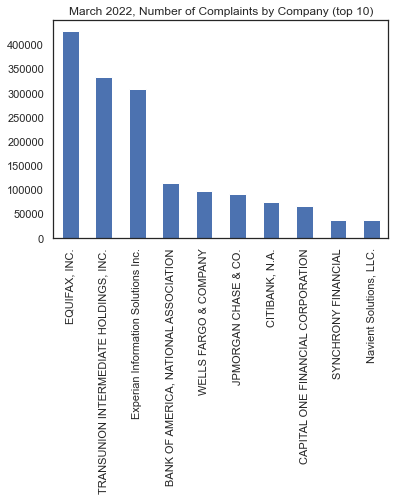

In [44]:
complaints.Company.value_counts()[:10].plot(title = 'March 2022, Number of Complaints by Company (top 10)', kind='bar')
plt.show()

In [52]:
complaints['Company response to consumer'].value_counts()

Closed with explanation            2133599
Closed with non-monetary relief     313687
Closed with monetary relief         114150
In progress                          44589
Closed without relief                17868
Closed                               17611
Untimely response                     9233
Closed with relief                    5304
Name: Company response to consumer, dtype: int64

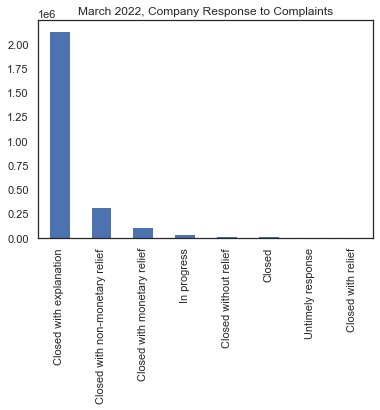

In [53]:
complaints['Company response to consumer'].value_counts().plot(title='March 2022, Company Response to Complaints', kind='bar')
plt.show()

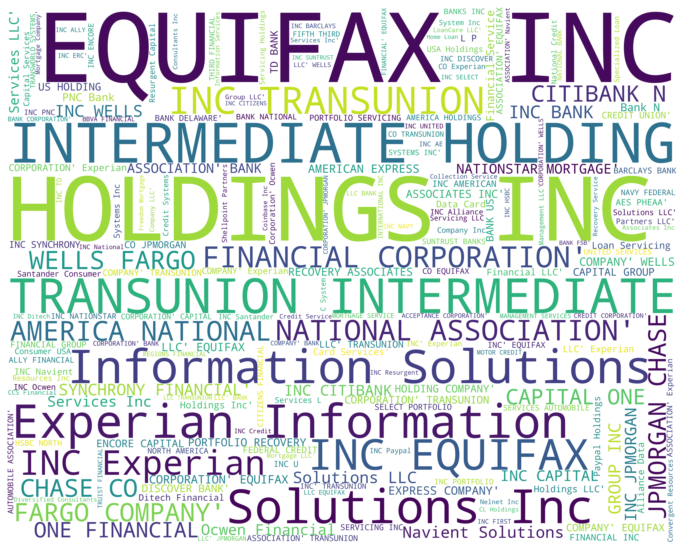

In [77]:
from wordcloud import WordCloud

def plot_wordcloud(wordcloud):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

company_names = complaints.Company.values.tolist()

wordcloud = WordCloud(max_font_size=None, max_words = 200, background_color="white", 
                      width=5000, height=4000, stopwords = stop_words).generate(str(company_names))

plot_wordcloud(wordcloud)

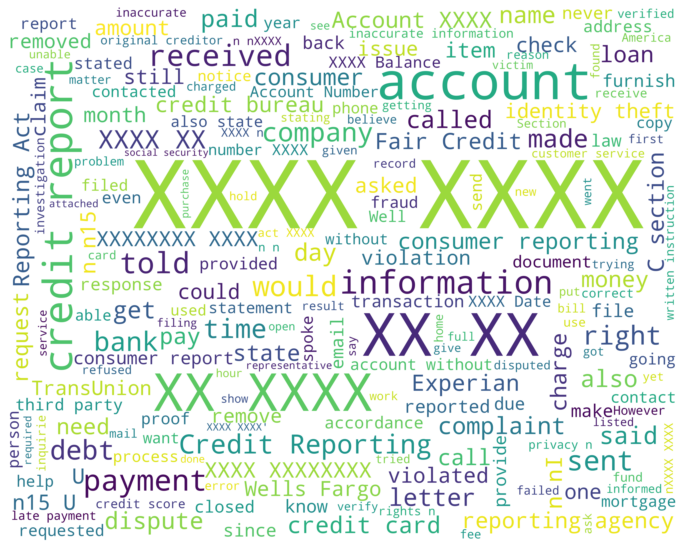

In [153]:
from wordcloud import WordCloud

def plot_wordcloud(wordcloud):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
    wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="white", 
                      width=5000, height=4000, stopwords=stop_words).generate(str(narrative))

plot_wordcloud(wordcloud)

In [80]:
! pip install vaderSentiment

     |████████████████████████████████| 125 kB 3.6 MB/s eta 0:00:01


In [83]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/neeharbujimalla/nltk_data...


True

In [88]:
#nltk.download('vader_lexicon')

# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [149]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [150]:
print_sentiment_scores("Closed with explanation")
print_sentiment_scores("Closed with monetary relief")

Closed with explanation----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Closed with monetary relief------------- {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4767}


In [155]:
senti_df = pd.read_csv("/Users/neeharbujimalla/Downloads/complaints.csv", 
                 usecols=('Issue', 'Consumer complaint narrative'), 
                 nrows=100000)
print('Sentiment Dataframe Shape: ', senti_df.shape)
senti_df.head(10)

Sentiment Dataframe Shape:  (100000, 2)


,Issue,Consumer complaint narrative
0,Managing an account,NaN
1,Improper use of your report,NaN
2,Incorrect information on your report,NaN
3,Incorrect information on your report,NaN
4,Problem with a credit reporting company's inve...,NaN
5,Problem with a credit reporting company's inve...,NaN
6,Incorrect information on your report,NaN
7,Improper use of your report,NaN
8,Problem with a credit reporting company's inve...,I previously sent my written request to Experi...
9,Problem with a credit reporting company's inve...,NaN


In [156]:
senti_df.isnull().sum()

Issue                               0
Consumer complaint narrative    87174
dtype: int64

In [157]:
senti_df = senti_df.dropna()
print('Dataset after removing Null values: ', senti_df.shape)

senti_df.head(10)

Dataset after removing Null values:  (12826, 2)


,Issue,Consumer complaint narrative
8,Problem with a credit reporting company's inve...,I previously sent my written request to Experi...
11,Fees or interest,It should be illegal. I havent use my credit c...
12,Incorrect information on your report,I have been a Kohls credit card holder for ove...
22,Improper use of your report,My credit reports are inaccurate. These inaccu...
25,Managing an account,Banking services or operating as expected. Sun...
26,Improper use of your report,In accordance with the Fair Credit Reporting a...
27,Incorrect information on your report,hello dear agency referring to my report i too...
33,Threatened to contact someone or share informa...,XX/XX/2022. The debt collection agency contact...
38,Improper use of your report,"Notice to all, I, am that I am, the consumer i..."
40,Problems at the end of the loan or lease,Penfed Credit Union refused to accept nor post...


In [158]:
# rename column to 'narrative'
senti_df.rename(columns = {'Consumer complaint narrative':'narrative'}, inplace = True)

# Convert to list
narrative = senti_df.narrative.values.tolist()

# Let's see how our narrative text looks like before cleaning
print(narrative[:1])

['I previously sent my written request to Experian about blocking or removing all the information that is erroneous and fraudulent. However, that request was never granted or any feedback was never done by the agency. Now, I would like to ask for your help to get rid of these items or have XXXX get back to me with regards to the issue. Here are the items that concern me : XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX']


In [159]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [160]:
senti_df['sentiment_neg'] = senti_df['narrative'].apply(negative_score)
senti_df['sentiment_neu'] = senti_df['narrative'].apply(neutral_score)
senti_df['sentiment_pos'] = senti_df['narrative'].apply(positive_score)
senti_df['sentiment_compound'] = senti_df['narrative'].apply(compound_score)

In [141]:
senti_df.head(10)

,Issue,narrative,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
8,Problem with a credit reporting company's inve...,I previously sent my written request to Experi...,0.084,0.874,0.042,-0.6298
11,Fees or interest,It should be illegal. I havent use my credit c...,0.121,0.802,0.077,-0.7477
12,Incorrect information on your report,I have been a Kohls credit card holder for ove...,0.043,0.902,0.056,0.3182
22,Improper use of your report,My credit reports are inaccurate. These inaccu...,0.136,0.704,0.160,0.2732
25,Managing an account,Banking services or operating as expected. Sun...,0.137,0.820,0.043,-0.7136
26,Improper use of your report,In accordance with the Fair Credit Reporting a...,0.058,0.858,0.084,0.1280
27,Incorrect information on your report,hello dear agency referring to my report i too...,0.000,0.788,0.212,0.9493
33,Threatened to contact someone or share informa...,XX/XX/2022. The debt collection agency contact...,0.156,0.830,0.013,-0.9142
38,Improper use of your report,"Notice to all, I, am that I am, the consumer i...",0.097,0.848,0.055,-0.6369
40,Problems at the end of the loan or lease,Penfed Credit Union refused to accept nor post...,0.093,0.719,0.188,0.7825


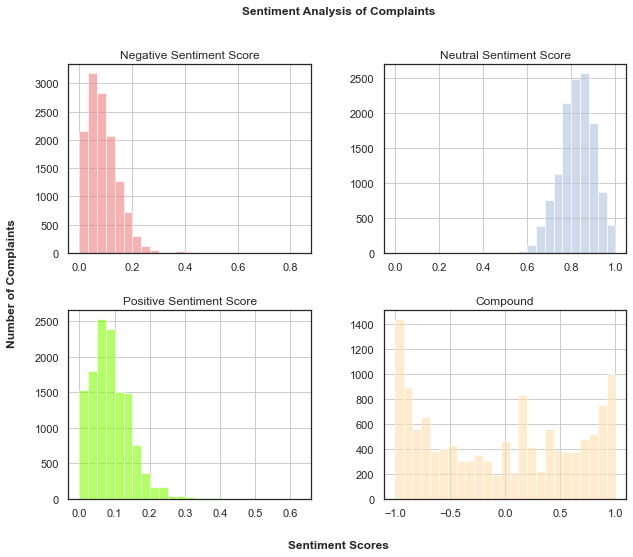

In [142]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
senti_df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
senti_df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
senti_df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
senti_df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Complaints', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Complaints\n\n', fontsize=12, fontweight='bold');

In [146]:
# full dataframe with POSITIVE comments
senti_df_pos = senti_df.loc[senti_df.sentiment_compound >= 0.9]

# only corpus of POSITIVE comments
pos_comments = senti_df_pos['narrative'].tolist()

# full dataframe with NEGATIVE comments
senti_df_neg = senti_df.loc[senti_df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = senti_df_neg['narrative'].tolist()

neg_comments[2:3]

['Banking services or operating as expected. SunTrust, BB & T merger into Now Truist has been a very visible failure. Having been referred to BBT in TX, no SunTrust brick and motor presence, BB & T ( now Truist ) had no banking information as to who we were as long standing SunTrust bankers. \nLong hold times, inoperable banking systems and no assistance after more than a year since the implementation of this merger.']

In [147]:
senti_df_pos['text_length'] = senti_df_pos['narrative'].apply(len)
senti_df_neg['text_length'] = senti_df_neg['narrative'].apply(len)

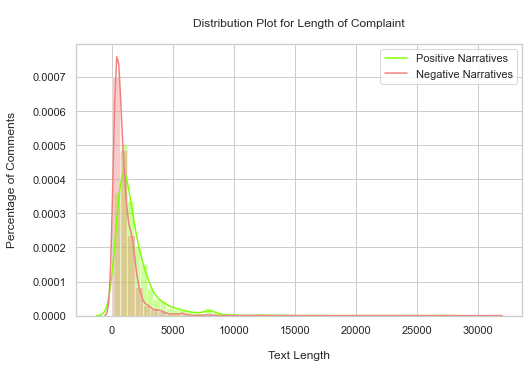

In [148]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(senti_df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(senti_df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Complaint\n')
plt.legend(['Positive Narratives', 'Negative Narratives'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');